In [25]:
import collections
import random

import numpy as np

# Original

In [26]:
def get_neighbor_set(self, items, item_target_dict):
    print('constructing neighbor set ...')
    neighbor_set = collections.defaultdict(list)
    for item in items:
        for hop in range(self.n_hop):
            # use the target directly
            if hop == 0:
                replace = len(item_target_dict[item]) < self.n_memory
                target_list = list(np.random.choice(item_target_dict[item], size=self.n_memory, replace=replace))
            else:
                # use the last one to find k+1 hop neighbors
                origin_nodes = neighbor_set[item][-1]
                neighbors = []
                for node in origin_nodes:
                    neighbors += self.graph.neighbors(node)
                # sample
                replace = len(neighbors) < self.n_memory
                target_list = list(np.random.choice(neighbors, size=self.n_memory, replace=replace))

            neighbor_set[item].append(target_list)

    return neighbor_set

# Graph aware random

In [27]:
def get_neighbor_set(self, items, item_target_dict):
        neighbor_set = collections.defaultdict(list)
        for item in items:
            for hop in range(self.n_hop):
                # use the target directly
                if hop == 0:
                    replace = len(item_target_dict[item]) < self.n_memory
                    target_list = list(np.random.choice(item_target_dict[item], size=self.n_memory, replace=replace))
                else:
                    # use the last one to find k+1 hop neighbors
                    origin_nodes = neighbor_set[item][-1]
                    neighbors = []
                    for node in origin_nodes:
                        neighbors += self.graph.neighbors(node)
                    
                    # Shuffle neighbors to randomize edges
                    random.shuffle(neighbors)
                    
                    # Sample after shuffling
                    replace = len(neighbors) < self.n_memory
                    target_list = list(np.random.choice(neighbors, size=self.n_memory, replace=replace))

                # Append shuffled target list
                random.shuffle(target_list)  # Additional shuffle for randomness
                neighbor_set[item].append(target_list)

        return neighbor_set

# Completly random

In [28]:
def get_neighbor_set(self, items, item_target_dict):
    neighbor_set = collections.defaultdict(list)
    all_nodes = list(self.graph.nodes())
    for item in items:
        for hop in range(self.n_hop):
            # Sample neighbors randomly from all nodes
            target_list = list(np.random.choice(all_nodes, size=self.n_memory, replace=True))
            # Shuffle the sampled neighbors for additional randomness
            random.shuffle(target_list)
            neighbor_set[item].append(target_list)

    return neighbor_set

# Results

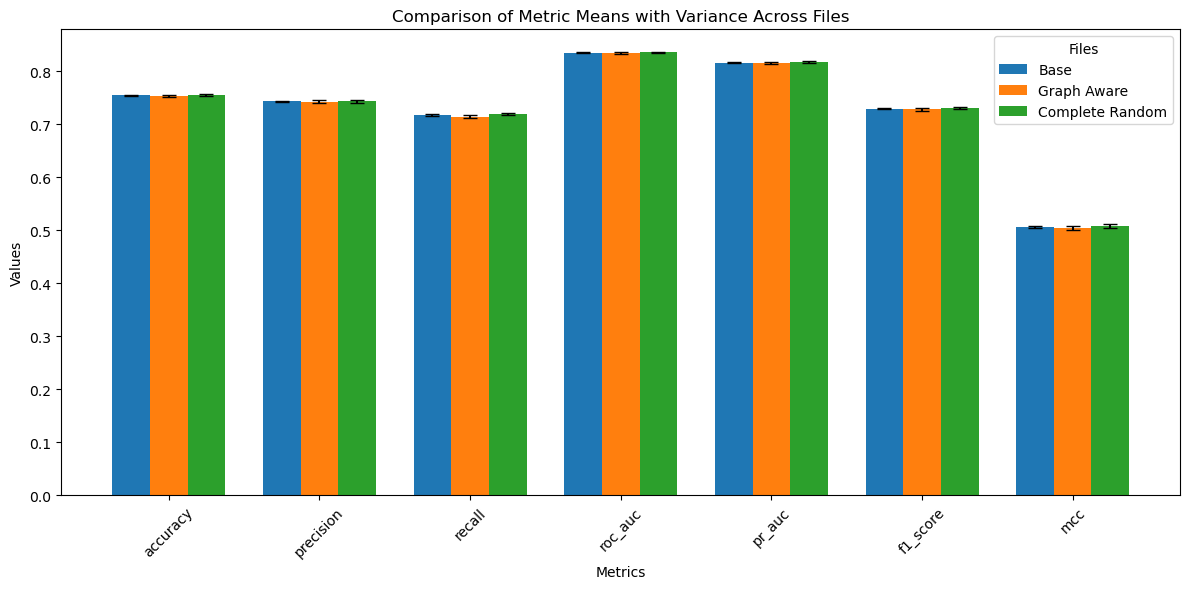

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV files into DataFrames
base_df = pd.read_csv('base.csv')
ga_df = pd.read_csv('graph_aware.csv')
comp_rand_df = pd.read_csv('complete_random.csv')

# Combine all DataFrames into a dictionary for easier processing
dataframes = {
    'Base': base_df,
    'Graph Aware': ga_df,
    'Complete Random': comp_rand_df
}

# Define the metrics to analyze
metrics = ['accuracy', 'precision', 'recall', 'roc_auc', 'pr_auc', 'f1_score', 'mcc']

# Compute mean and variance for each metric in each DataFrame
mean_results = {key: df[metrics].mean() for key, df in dataframes.items()}
var_results = {key: df[metrics].var() for key, df in dataframes.items()}

# Convert results into DataFrames
mean_df = pd.DataFrame(mean_results)
var_df = pd.DataFrame(var_results)

# Plot bar graph with error bars for variance (as standard deviation)
x = np.arange(len(metrics))  # X-axis positions for metrics
width = 0.25  # Width of each bar

fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for each DataFrame with error bars
for i, (label, means) in enumerate(mean_df.items()):
    std_devs = np.sqrt(var_df[label])  # Standard deviation for error bars
    ax.bar(x + i * width, means, width, yerr=std_devs, capsize=5, label=label)

# Customize the plot
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Metric Means with Variance Across Files')
ax.set_xticks(x + width)  # Center the labels
ax.set_xticklabels(metrics, rotation=45)  # Add metric names as x-tick labels
ax.legend(title='Files')

# Show plot
plt.tight_layout()
plt.show()